In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Data preparation, model building and accuracy checking libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset:
df_diabetes = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.shape

(768, 9)

In [ ]:
#Checking for zero values where it's not expected:
def check_zeroes(dataframe):
    for column in dataframe:
        if column == 'Pregnancies' or column == 'Outcome':
            continue
        try:
            print(column, ":", dataframe[column].value_counts()[0])
        except KeyError:
            print(column, ":", 0)

In [ ]:
check_zeroes(df_diabetes)

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


In [ ]:
#Checking for percentage of zero values:
def check_zeroes_pct(dataframe):
    for column in dataframe:
        if column == 'Pregnancies' or column == 'Outcome':
            continue
        try:
            print(column, ": {}%".format(round((dataframe[column].value_counts()[0] / dataframe[column].value_counts().sum())*100 , 2)))
        except KeyError:
            print(column, ": {}%".format(0))
            
check_zeroes_pct(df_diabetes)

Glucose : 0.65%
BloodPressure : 4.56%
SkinThickness : 29.56%
Insulin : 48.7%
BMI : 1.43%
DiabetesPedigreeFunction : 0%
Age : 0%


In [ ]:
#Removing the rows that contain zero values from Insulin column:
diabetes = df_diabetes.copy()
diabetes = diabetes[diabetes.Insulin > 0]
diabetes.shape

(394, 9)

In [ ]:
check_zeroes(diabetes)

Glucose : 1
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 1
DiabetesPedigreeFunction : 0
Age : 0


In [ ]:
#Replacing the zero values in the Glucose and BMI columns with their respective column medians:
diabetes['Glucose'] = diabetes['Glucose'].replace(to_replace = [0], value = [np.median(diabetes.Glucose)])
diabetes['BMI'] = diabetes['BMI'].replace(to_replace = [0], value = [np.median(diabetes.BMI)])

In [ ]:
check_zeroes(diabetes)

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0


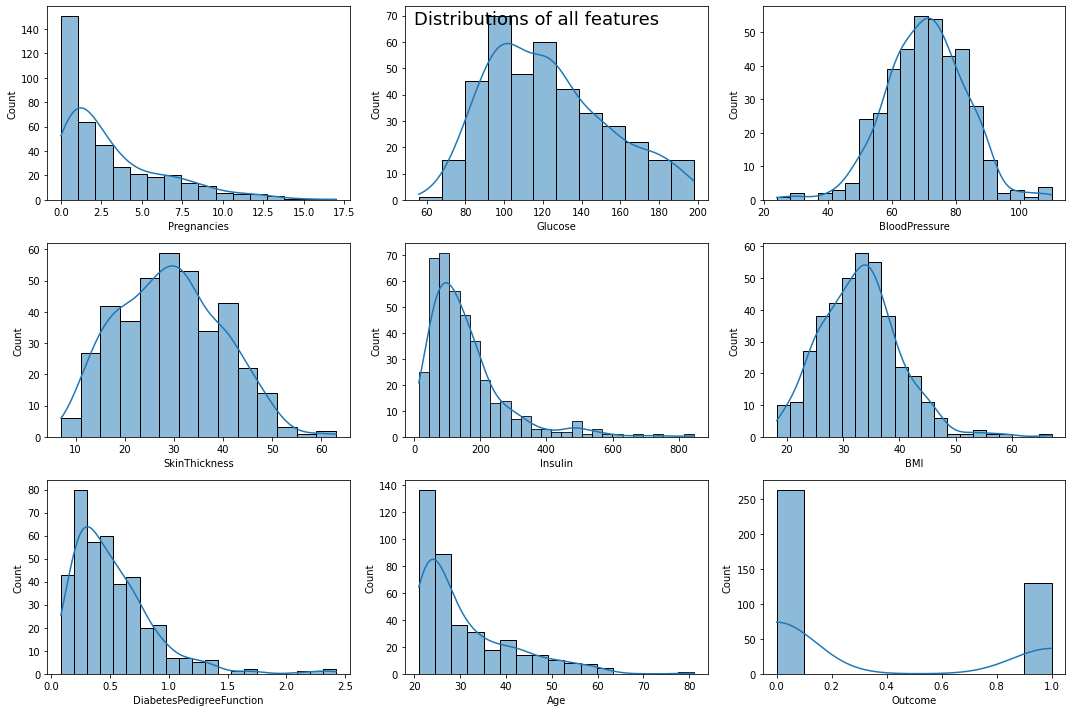

In [ ]:
#Understanding the distribution of all the features in the dataset:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(diabetes, ax.flatten()):
    sns.histplot(x = diabetes[column], kde = True, ax = subplot)

fig.suptitle('Distributions of all features', fontsize = 18)
fig.tight_layout()
plt.show()

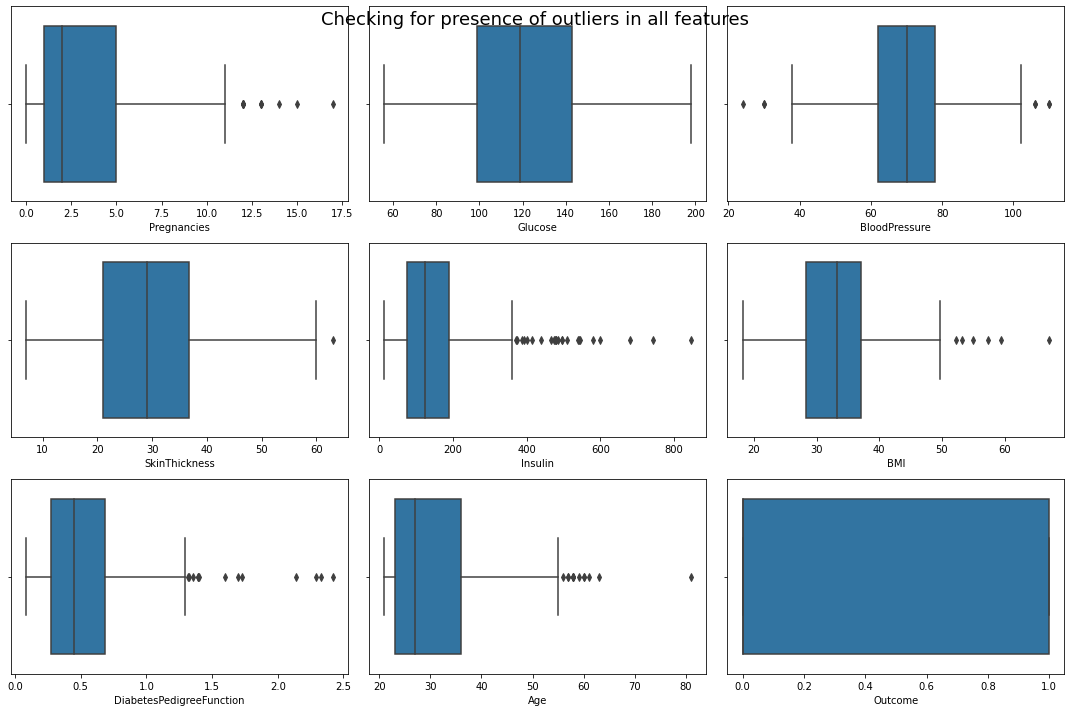

In [ ]:
#Visualising the outliers in all the features:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(diabetes, ax.flatten()):
    sns.boxplot(x = diabetes[column], ax = subplot)

fig.suptitle('Checking for presence of outliers in all features', fontsize = 18)
fig.tight_layout()
plt.show()

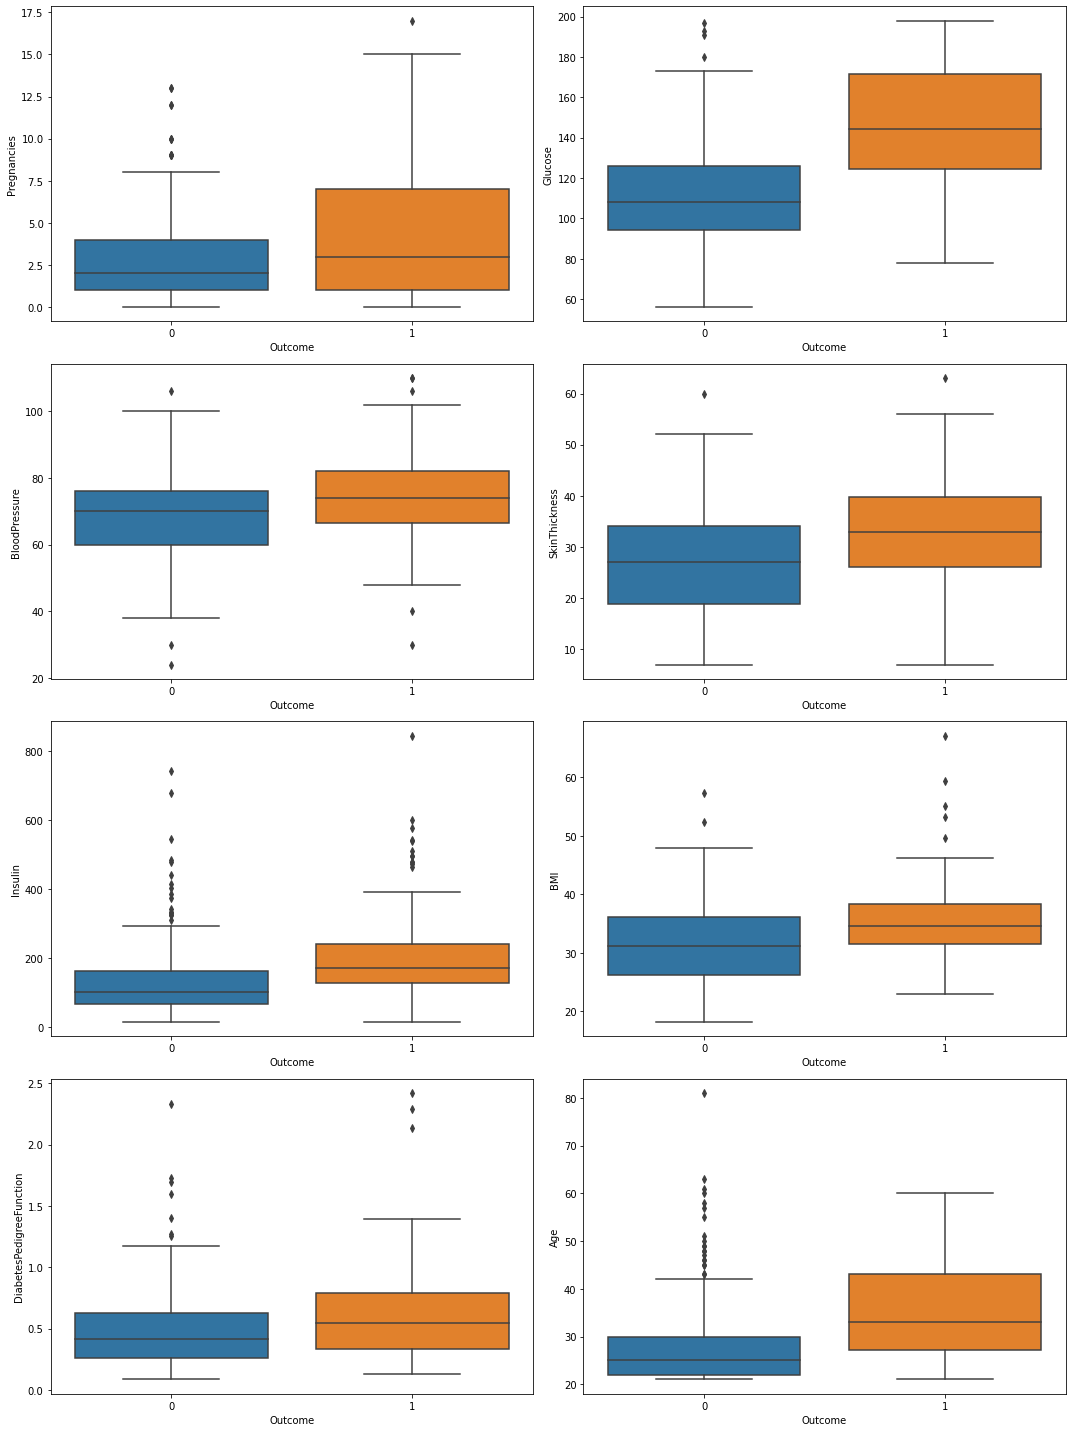

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (15,20))
for column, subplot in zip(diabetes, ax.flatten()):
    if column == 'Outcome':
        continue
    sns.boxplot(x = diabetes.Outcome, y = diabetes[column], ax = subplot)
    
fig.tight_layout()
plt.show()

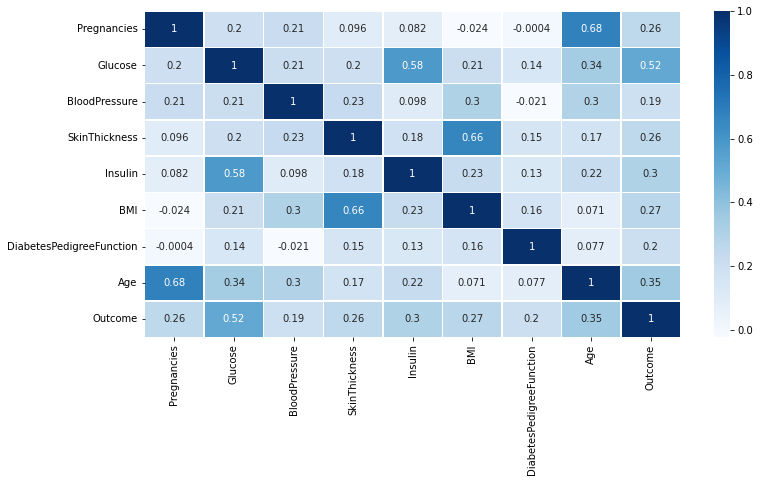

In [ ]:
#Plotting a correlation matrix:
corr = diabetes.corr()
fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = 0.5, ax = ax)
plt.show()

In [ ]:
#Splitting the dataset into dependent and independent features:
y = diabetes.Outcome
x = diabetes.drop(['Outcome'], axis = 1)

In [ ]:
#Scaling the independent features:
scaler = StandardScaler()
scaler.fit(x)
X = scaler.fit_transform(x)

In [ ]:
accuracy_scores = []
seeds = range(0,101)

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    Logit_Model = LogisticRegression()
    Logit_Model.fit(X_train,y_train)
    Logit_Prediction = Logit_Model.predict(X_test)
    Logit_Score = accuracy_score(y_test,Logit_Prediction)
    accuracy_scores.append(Logit_Score)

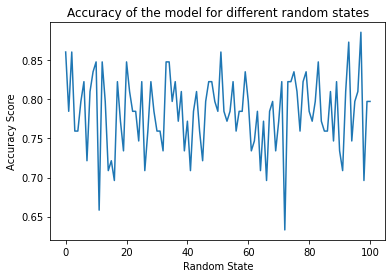

In [ ]:
plt.plot(seeds, accuracy_scores)
plt.title("Accuracy of the model for different random states")
plt.ylabel('Accuracy Score')
plt.xlabel('Random State')
plt.show()

In [ ]:
maxAcc = max(accuracy_scores)
maxAccState = accuracy_scores.index(maxAcc)
print("The highest accuracy is:", maxAcc)
print("The random state that offers the highest accuracy is:", maxAccState)

The highest accuracy is: 0.8860759493670886
The random state that offers the highest accuracy is: 97


In [ ]:
#Splitting the dataset into training and testing set based on the best random state found:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = maxAccState)

In [ ]:
#Fitting the data on the logistic regression model and making predictions:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)
Logit_Prediction = Logit_Model.predict(X_test)

In [ ]:
#Defining a function for plotting confusion matrix:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title("Confusion matrix for " + model_name, fontsize = 15)
    plt.show()

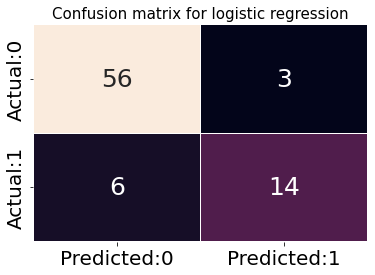

In [ ]:
#Plotting confusion matrix:
plot_confusion_matrix(y_test, Logit_Prediction, "logistic regression")

In [ ]:
Logit_Score = accuracy_score(y_test,Logit_Prediction)
Logit_Report = classification_report(y_test,Logit_Prediction)

In [ ]:
#Printing the accuracy scores:
print("Logistic Regression Score:", Logit_Score)

Logistic Regression Score: 0.8860759493670886


In [ ]:
#Printing the classification reports:
print("Logistic Regression Classification Report:\n\n", Logit_Report)

Logistic Regression Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.82      0.70      0.76        20

    accuracy                           0.89        79
   macro avg       0.86      0.82      0.84        79
weighted avg       0.88      0.89      0.88        79

